In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv("placement (1).csv")

In [3]:
df.head(5)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [4]:
df.shape

(1000, 3)

In [5]:
df.sample(5)

,cgpa,placement_exam_marks,placed
812,5.99,23.0,0
244,7.68,44.0,0
699,6.64,20.0,0
448,6.32,31.0,0
371,5.90,29.0,0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_16088\435420608.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])


<Axes: xlabel='cgpa', ylabel='Density'>

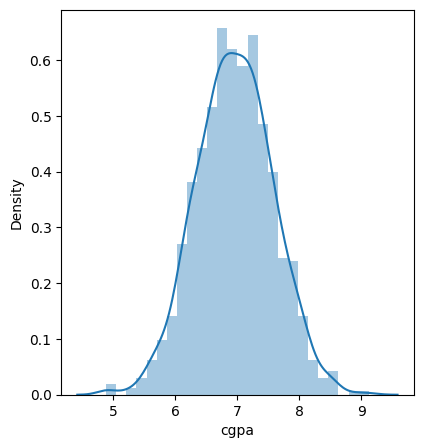

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.distplot(df['cgpa'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_16088\4243004278.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


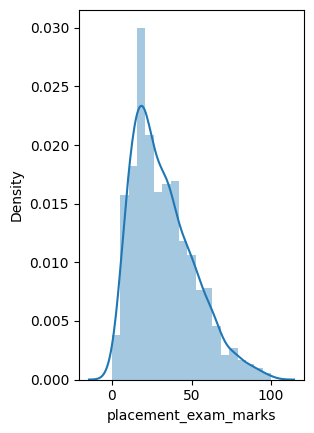

In [7]:
plt.subplot(122)
sns.distplot(df['placement_exam_marks'])
plt.show()

In [8]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [9]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [10]:
df['cgpa'].skew()

np.float64(-0.014529938929314918)

In [11]:
print("Mean value of cgpa:" , df['cgpa'].mean())
print("mean value of placement_exam_marks : " , df['placement_exam_marks'].mean())



Mean value of cgpa: 6.96124
mean value of placement_exam_marks :  32.225


In [12]:
print("std value of the cgpa : " , df['cgpa'].std())
print("min value of the cgpa : ", df['cgpa'].min())
print("max value of the cgap : ", df['cgpa'].max())

std value of the cgpa :  0.6158978751323896
min value of the cgpa :  4.89
max value of the cgap :  9.12


In [13]:
# finding the boundaries values 

In [14]:
print("highest allowed cgpa : " , df['cgpa'].mean() + 3*df['cgpa'].std())
print("lowest allowed cgpa : " , df['cgpa'].mean() - 3*df['cgpa'].std())

highest allowed cgpa :  8.808933625397168
lowest allowed cgpa :  5.113546374602832


In [15]:
# finding the outliers 
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


# Trimming 

In [16]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]

In [17]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


# APPROACH 2 

In [18]:
# calculating the Z-score .

In [19]:
df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean()) / df['cgpa'].std()

In [20]:
df.head()

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371


In [21]:
df[df['cgpa_zscore'] > 3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [22]:
df[df['cgpa_zscore'] > -3]

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [23]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [24]:
# trimming 
new_Df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [25]:
new_Df

,cgpa,placement_exam_marks,placed,cgpa_zscore
0,7.19,26.0,1,0.371425
1,7.46,38.0,1,0.809810
2,7.54,40.0,1,0.939701
3,6.42,8.0,1,-0.878782
4,7.23,17.0,0,0.436371
...,...,...,...,...
991,7.04,57.0,0,0.127878
992,6.26,12.0,0,-1.138565
993,6.73,21.0,1,-0.375452
994,6.48,63.0,0,-0.781363


# Capping 

In [26]:
upperlimit = df['cgpa'].mean() + 3*df['cgpa'].std()
lowerlimit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [27]:
df['cgpa'] = np.where(
    df['cgpa']>upperlimit,
    upperlimit,
    np.where(
        df['cgpa']<lowerlimit,
        lowerlimit,
        df['cgpa']
    )
)

In [28]:
df.shape

(1000, 4)

In [29]:
df['cgpa'].describe()


count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64